In [2]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import warnings

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
df = pd.read_csv('../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')


In [4]:
df.shape

(372450, 785)

In [5]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = df.drop('0',axis=1)
y = df['0']

In [7]:
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0],28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0],28,28))

print('Train Data Shape: ', train_x.shape)
print('Test Data Shape: ', test_x.shape)

Train Data Shape:  (297960, 28, 28)
Test Data Shape:  (74490, 28, 28)


In [8]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

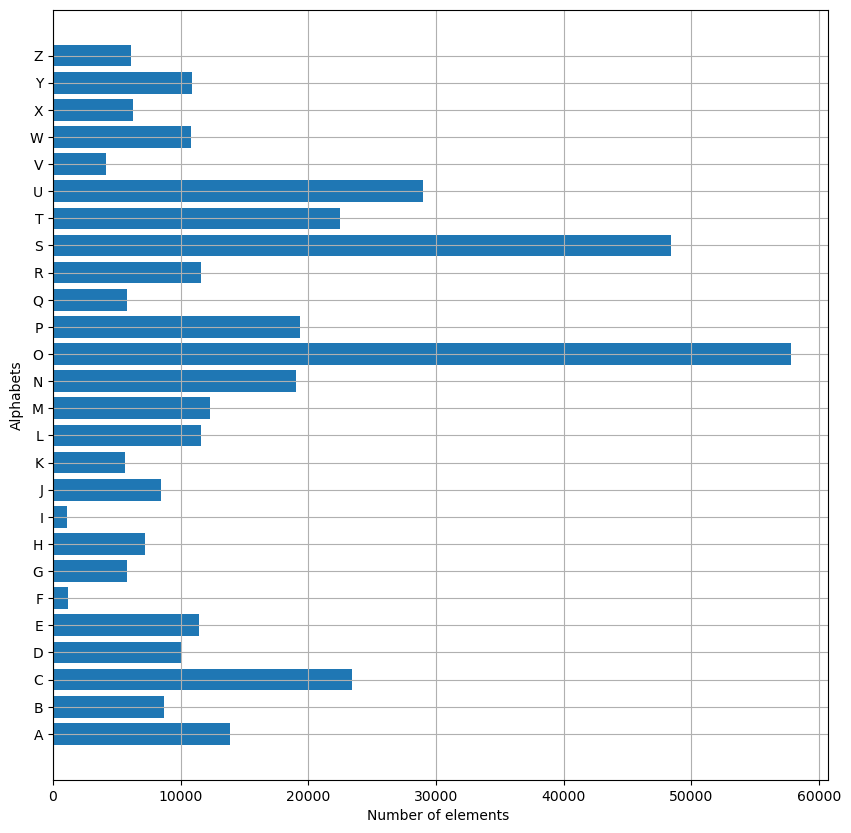

In [9]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

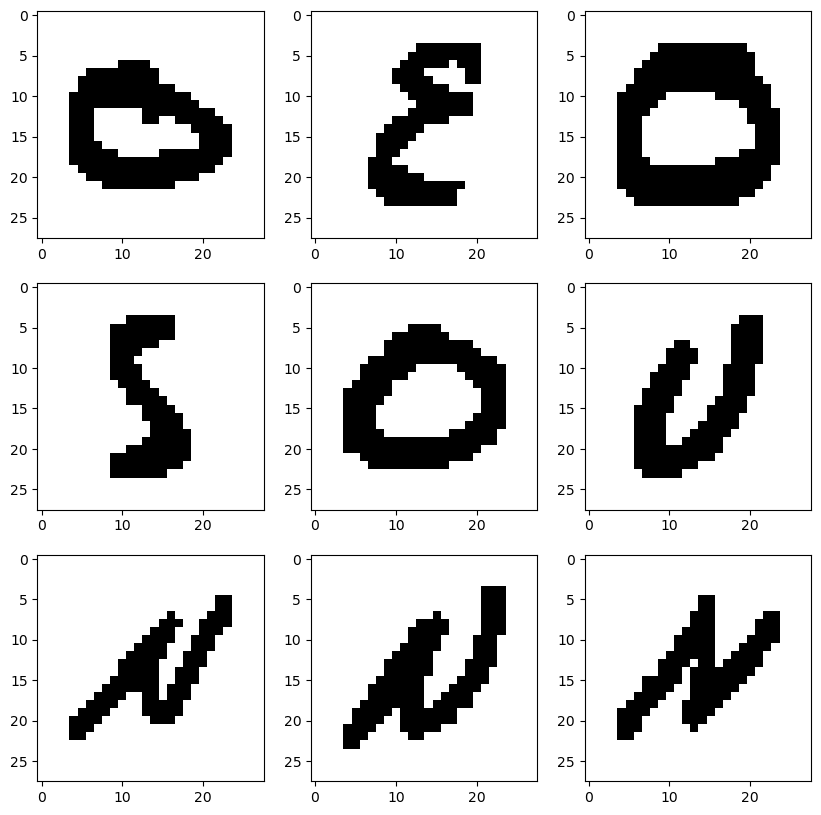

In [10]:
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3, 3, figsize=(10, 10))
axes = ax.flatten()

for i in range(9):
    thresholded_image = np.where(shuff[i] < 30, 0, 255)
    axes[i].imshow(np.reshape(thresholded_image, (28, 28)), cmap="Greys")

plt.show()

In [11]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [12]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [13]:
model = Sequential()

# 3 Covulational and MaxPooling Layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# 1 Flatten later (2d to 1d vector)
model.add(Flatten())

# 2 fully functional layers
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

#lx net and le net try***

#Output layer
model.add(Dense(26,activation ="softmax"))

In [14]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

9312/9312 [==============================] - 231s 25ms/step - loss: 0.1520 - accuracy: 0.9577 - val_loss: 0.0810 - val_accuracy: 0.9784


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [16]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9783729314804077]
The training accuracy is : [0.9576654434204102]
The validation loss is : [0.0810454711318016]
The training loss is : [0.1519905924797058]


In [17]:
model.save(r'AlphabetRecog_Model.h5')

In [18]:
test_loss, test_accuracy = model.evaluate(test_X, test_yOHE)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

2328/2328 [==============================] - 17s 7ms/step - loss: 0.0810 - accuracy: 0.9784
Test Loss: 0.0810454711318016
Test Accuracy: 0.9783729314804077


In [19]:
predictions = model.predict(test_X)

2328/2328 [==============================] - 16s 7ms/step


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Convert one-hot encoded test labels back to integers
test_y = np.argmax(test_yOHE, axis=1)

# Get the model's predictions as integers
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
confusion = confusion_matrix(test_y, predicted_labels)
print("Confusion Matrix:")
print(confusion)

# Generate a classification report
class_report = classification_report(test_y, predicted_labels, target_names=alphabets)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[ 2778     1     0     0     0     0     0    24     0     0     0     1
      0     1     0     0     0     6     0     0     0     0     0     0
      0     0]
 [    4  1700     0     1     0     0     1     0     0     0     0     0
      0     0     3     1     1    10     5     0     0     0     0     0
      0     1]
 [    1     0  4586     0     1     0     1     0     2     0    17    22
      0     0     6     2     1     7     3     2    15     0     0     0
      0     1]
 [   13    30     0  1870     0     0     0     0     0     1     0     1
      1     4    94    12     0     0     2     0     3     0     0     0
      0     0]
 [    1     2    34     0  2180     9    12     4     3     3    27     9
      0     0     0     0     0     6    11     0     2     0     0     0
      0     9]
 [    4     0     0     0     2   232     0     0     0     0     0     0
      0     0     0     1     0     0     1     1     0     0     0     0
      0     0]
 [  

In [21]:
# Generate a random index to select a random image from the test set
random_index = random.randint(0, len(test_X) - 1)

# Get the input image from the test set
input_image = test_X[random_index].reshape(1, 28, 28, 1)

# Make a prediction using the model
predicted_probabilities = model.predict(input_image)
predicted_class = np.argmax(predicted_probabilities)

# Convert the predicted class to the corresponding alphabet
predicted_alphabet = word_dict[predicted_class]

# Get the true label from the test set
true_class = np.argmax(test_yOHE[random_index])
true_alphabet = word_dict[true_class]

# Display the input image, true label, and predicted label
plt.figure(figsize=(4, 4))
plt.imshow(input_image.reshape(28, 28), cmap="gray")
plt.title(f"True: {true_alphabet}, Predicted: {predicted_alphabet}")
plt.axis('off')
plt.show()


NameError: name 'random' is not defined